In [29]:
# Import pandas for building dataframes
import pandas as pd

import sys

# Import numpy
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# Import matplotlib for graphs, set inline
from matplotlib import pyplot as plt
# %matplotlib inline
import seaborn as sns
# Import datasets for use
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import re
import pickle

In [30]:
Xtrain_df=pd.read_csv("X_Train.csv")
Ytrain_df=pd.read_csv("Y_Train.csv")
Xtest_df =pd.read_csv("X_test.csv")

Xtrain_copy = Xtrain_df.copy()

In [31]:
# Xtrain_df.isnull().sum()

In [32]:
Xtrain_df

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,122283168,113223627,Caucasian,Female,[80-90),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,Yes
1,97835454,25776306,Caucasian,Female,[80-90),?,5,3,17,3,...,No,No,Steady,No,No,No,No,No,No,Yes
2,431347352,42491844,Caucasian,Male,[50-60),?,3,1,1,1,...,No,No,Steady,No,No,No,No,No,No,Yes
3,153301914,87104907,Caucasian,Female,[70-80),?,5,3,1,3,...,No,No,No,No,No,No,No,No,No,No
4,304851608,70844364,Caucasian,Female,[90-100),?,1,3,7,5,...,No,No,Steady,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,64367586,89250084,Caucasian,Female,[80-90),?,2,1,7,2,...,No,No,Steady,No,No,No,No,No,Ch,Yes
71232,290180694,44177697,Caucasian,Male,[60-70),?,3,1,1,4,...,No,No,Up,No,No,No,No,No,Ch,Yes
71233,130101072,113734728,Caucasian,Female,[80-90),?,2,3,7,6,...,No,No,No,No,No,No,No,No,No,No
71234,26933646,107965575,Caucasian,Female,[80-90),?,2,6,20,4,...,No,No,Steady,No,No,No,No,No,No,Yes


In [33]:
Xtrain_df.columns

Index(['id', 'patient_no', 'cast', 'gender', 'age group', 'weight',
       'admission_typeid', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'Med'],
      dtype='object')

In [34]:
columnsToDrop = ['glimepiride-pioglitazone','acarbose','metformin-rosiglitazone','metformin-pioglitazone','glipizide-metformin','glyburide-metformin','citoglipton','examide','troglitazone','tolbutamide','acetohexamide','miglitol','tolazamide','chlorpropamide','age group','gender','weight','id', 'patient_no', 'cast', 'admission_typeid','change', 'Med' ,'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses']
Xtrain_df.drop(columns =columnsToDrop, inplace = True)

In [35]:
columns = Xtrain_df.columns

In [36]:
for col in columns:
    unique = Xtrain_copy[col].unique()
    mapping = dict(zip(unique, range(0, len(unique)))) 
    Xtrain_df[col] = Xtrain_df[col].map(mapping.get)
    print(mapping)
    
    


{'None': 0, '>300': 1, 'Norm': 2, '>200': 3}
{'Norm': 0, 'None': 1, '>8': 2, '>7': 3}
{'No': 0, 'Up': 1, 'Steady': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'Steady': 0, 'No': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}


In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain_df = scaler.fit_transform(Xtrain_df)

In [38]:
column = ['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone','rosiglitazone', 'insulin']
Xtrain_df = pd.DataFrame(data = Xtrain_df, columns=column )

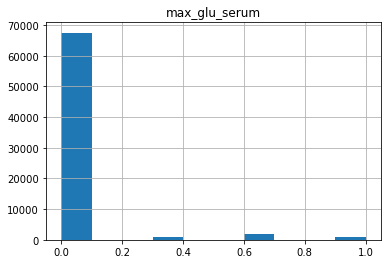

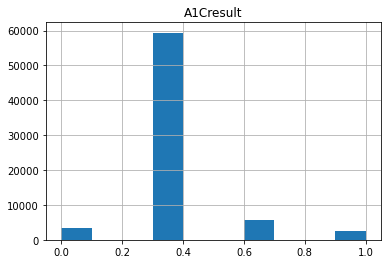

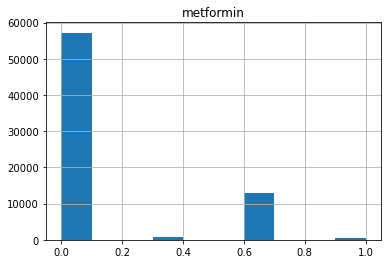

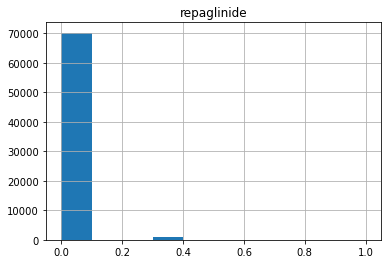

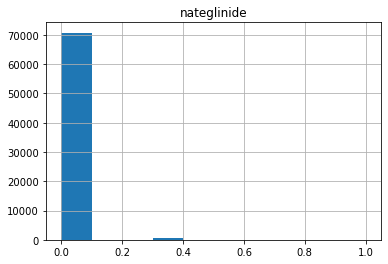

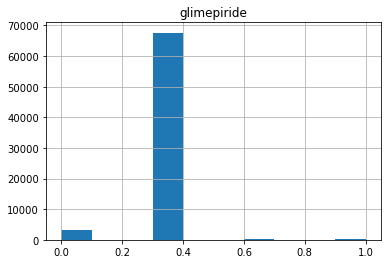

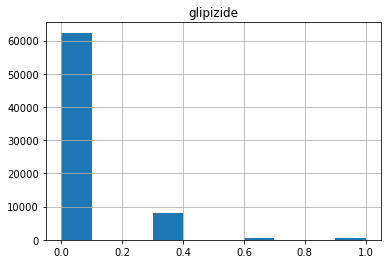

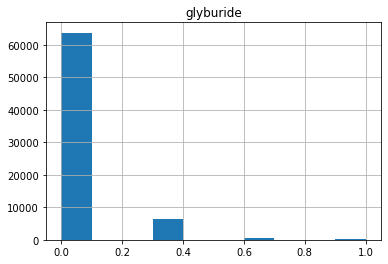

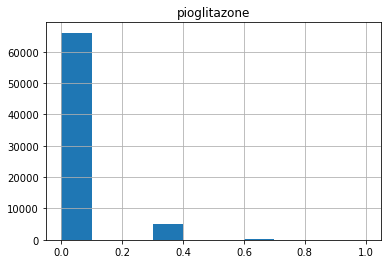

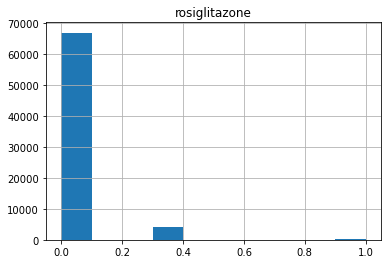

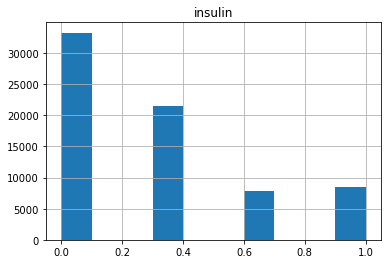

In [39]:
for col in Xtrain_df.columns:
    Xtrain_df.hist(col)

In [40]:
Xtrain_df.columns

Index(['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin'],
      dtype='object')

In [41]:
Xtrain_df

,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,0.333333,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.333333
2,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.333333
3,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.000000
4,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
71231,0.000000,0.333333,0.666667,0.0,0.0,0.333333,0.0,0.333333,0.0,0.333333,0.333333
71232,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.666667
71233,0.000000,0.666667,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.000000
71234,0.000000,0.333333,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.333333


In [42]:
Xtrain_df.describe()

,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,0.035563,0.368816,0.129593,0.005830,0.002405,0.320634,0.048449,0.041449,0.025605,0.022344,0.294238
std,0.161198,0.172068,0.265181,0.051949,0.030446,0.078001,0.141525,0.132423,0.095798,0.091375,0.340335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
75%,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# for col in Xtrain_df.columns:
#     for index, row in Xtrain_df[col].iteritems():
#         if row >= int(Xtrain_df[col].std() + Xtrain_df[col].mean())*2 or row <= int(Xtrain_df[col].std() + Xtrain_df[col].mean())*2:
#             Xtrain_df.drop(index, inplace = True)
# #         print(index)

In [44]:
# Xtrain_df.hist('max_glu_serum')

In [45]:
# for col in Xtrain_df.columns: 
#     try:      
#         Xtrain_df[col] = pd.to_numeric(Xtrain_df[col]) 
#         Xtrain_df.hist(column=col)
#     except ValueError:
#         print('This column can not be represented as a histogram')

In [46]:
Ytrain_df['label'].unique()


array(['NO', '<30', '>5'], dtype=object)

In [47]:
Ytrain_df["label"] = Ytrain_df["label"].map({"NO":0,"<30":1, ">5":2}.get)

In [48]:
Ytrain_df

,label
0,0
1,0
2,1
3,0
4,0
...,...
71231,1
71232,0
71233,0
71234,0


In [49]:
x = Xtrain_df.to_numpy()
y = Ytrain_df.to_numpy()

In [53]:
pca = PCA(n_components = 11)
x = pd.DataFrame(pca.fit_transform(Xtrain_df))
# xTest = pd.DataFrame(pca.fit_transform(Xtest_df))

In [54]:
from sklearn.preprocessing import LabelEncoder
y = Ytrain_df.apply(LabelEncoder().fit_transform)

In [58]:
RFC = RandomForestClassifier(max_features = None ,criterion='entropy' ,bootstrap=True,oob_score=True)
# NB_clf = GaussianNB()
# KNN = KNeighborsClassifier(n_neighbors=10, weights='distance')
# DT = DecisionTreeClassifier()

In [59]:
RFC.fit(x, y.values.ravel())
RFC.score(x, y)

# NB_clf.fit(x, y.values.ravel())
# NB_clf.score(x, y)

# KNN.fit(x, y.values.ravel())
# KNN.score(x, y)

# DT.fit(x, y.values.ravel())
# DT.score(x, y)

0.5534982312313999

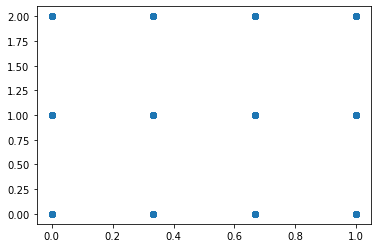

In [60]:
# for col in Xtrain_df.columns:
#     plt.scatter(Xtrain_df[col],y)
plt.scatter(Xtrain_df['pioglitazone'],y)

In [61]:
columnsToDrop = ['glimepiride-pioglitazone','acarbose','metformin-rosiglitazone','metformin-pioglitazone','glipizide-metformin','glyburide-metformin','citoglipton','examide','troglitazone','tolbutamide','acetohexamide','miglitol','tolazamide','chlorpropamide','age group','gender','weight','id', 'patient_no', 'cast', 'admission_typeid','change', 'Med' ,'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses']
Xtest_df.drop(columns =columnsToDrop, inplace = True)

In [62]:
for col in columns:
    unique = Xtrain_copy[col].unique()
    
    if col=='chlorpropamide' or col == 'glimepiride-pioglitazone':
        continue
    
    mapping = dict(zip(unique, range(0, len(unique)))) 
    print(Xtest_df[col].unique())
    Xtest_df[col] = Xtest_df[col].map(mapping.get)
    print(mapping)
    


['Norm' 'None' '>200' '>300']
{'None': 0, '>300': 1, 'Norm': 2, '>200': 3}
['None' '>8' 'Norm' '>7']
{'Norm': 0, 'None': 1, '>8': 2, '>7': 3}
['No' 'Steady' 'Down' 'Up']
{'No': 0, 'Up': 1, 'Steady': 2, 'Down': 3}
['No' 'Steady' 'Up' 'Down']
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
['No' 'Steady' 'Up' 'Down']
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
['No' 'Steady' 'Up' 'Down']
{'Steady': 0, 'No': 1, 'Up': 2, 'Down': 3}
['No' 'Steady' 'Up' 'Down']
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
['Steady' 'No' 'Up' 'Down']
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
['No' 'Up' 'Steady' 'Down']
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}
['No' 'Steady' 'Up' 'Down']
{'No': 0, 'Steady': 1, 'Down': 2, 'Up': 3}
['No' 'Steady' 'Down' 'Up']
{'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}


In [63]:
xTest = pd.DataFrame(pca.fit_transform(Xtest_df))

In [64]:
# print(Xtrain_copy["chlorpropamide"].unique())
# print(Xtest_df["chlorpropamide"].unique())


# print(Xtrain_copy["glimepiride-pioglitazone"].unique())
# print(Xtest_df["glimepiride-pioglitazone"].unique())


In [65]:

# # Xtest_df["chlorpropamide"] = Xtest_df["chlorpropamide"].map({"No":0,"Steady":1, "Up":3, "Down":2}.get)
# Xtest_df["glimepiride-pioglitazone"] = Xtest_df["glimepiride-pioglitazone"].map({"No":0,"Steady":1}.get)


In [66]:
result = RFC.predict(xTest)

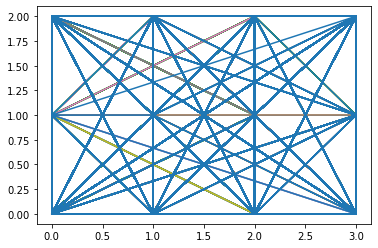

In [67]:
plt.plot(Xtest_df,result)

In [68]:
# Xtest_df.iloc[:,7:]

In [69]:
result_df = pd.DataFrame(data = result , columns = ['label'] )

In [70]:
id = pd.DataFrame(data =range(1,len(result)+1), columns = ['Id'] )

In [71]:
# id.to_csv("id.csv",index=False)

In [72]:
id.shape

(30530, 1)

In [73]:
result_df.shape

(30530, 1)

In [74]:
save = pd.DataFrame()

In [75]:
save["id"] = id['Id']

In [76]:
save["label"] = result_df['label']

In [77]:
save["label"] = save["label"].map({0:'NO',1:'<30', 2:">5"}.get)

In [78]:
save.to_csv("results.csv",index=False)

In [79]:
Ytrain_df['label'].value_counts()

0    38400
2    24870
1     7966
Name: label, dtype: int64

In [80]:
Xtest_df

,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
0,2,1,0,0,0,1,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,1,0,0,2,0,1
3,0,1,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
30525,0,1,0,0,0,1,1,0,0,0,0
30526,0,0,0,0,0,1,0,0,0,0,0
30527,0,2,0,0,0,1,0,0,0,0,2
30528,0,1,0,0,0,1,0,0,0,1,1
